#Mengakses Dataset

Dataset dari link yang diberikan

Kriteria 1 : menggunakan dataset yang diberikan 

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-13 04:40:23--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.1’

rockpaperscissors.z 100%[===================>] 307.92M  7.67MB/s    in 43s     

2021-07-13 04:41:07 (7.16 MB/s) - ‘rockpaperscissors.zip.1’ saved [322873683/322873683]



##Mengekstrak data set 

In [ ]:
import os
import zipfile

local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()


mengekstrak data set 

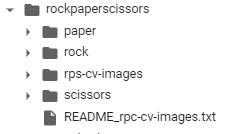

## cek jumlah data, format, dan sample gambar gunting, batu dan kertas

In [ ]:
import os
fold_gunting = os.path.join('/content/rockpaperscissors/scissors')
fold_batu = os.path.join('/content/rockpaperscissors/rock')
fold_kertas = os.path.join('/content/rockpaperscissors/paper')

print('jumlah total gambar gunting:', len(os.listdir(fold_gunting)))
print('jumlah total gambar batu:', len(os.listdir(fold_batu)))
print('jumlah total gambar kertas:', len(os.listdir(fold_kertas)))

jumlah total gambar gunting: 750
jumlah total gambar batu: 726
jumlah total gambar kertas: 712


In [ ]:
print("nama file gambar:")

file_gunting = os.listdir(fold_gunting)
print("gunting:", file_gunting[:10])

file_batu = os.listdir(fold_batu)
print("batu:", file_batu[:10])

file_kertas = os.listdir(fold_kertas)
print("kertas:", file_kertas[:10])

nama file gambar:
gunting: ['fRkWkCO0r8ZJ6ury.png', 'aMTILDN4K2ZEjYAx.png', 'lMMb00aQLU5FP5rd.png', 'ksWe2SZsjOoLAzf5.png', 'pZ9zE5ahoKZhIZqm.png', 'VaVPcDb7mPMQ1gHk.png', 'Dl9fg6ttVQY9U28G.png', 'twG9gv5cSKwb2CqR.png', 'tZYSEIgQN7PZ31tk.png', 'uFQ3SN5QxNyXoBmx.png']
batu: ['kcZfTQqKr8VaSjhk.png', 'nu556y52qDHFKRYy.png', 'vL6UMd1OOIGuEdFu.png', 'PxixapAFqLmRaP6k.png', 'hyWWmz1OwgoE5JlU.png', 'GP5y9O5zbmzBGtzr.png', 'OTf1IyhsDRDSoYTw.png', 'bsXoToIcgrXUypd0.png', '3wrX8EawcOolzrAY.png', '5EEdNZWT8M9PThPB.png']
kertas: ['yM5JZ5J4uLeYIGOO.png', 'Cx9G4YyKPI9MPcqp.png', '5Cy2fFOaWMFwa5iu.png', 'nmkNauqVsM2JUvok.png', 'NnWvTxntBJ5mFY73.png', 'Nm8PHXHrGlZy0d6Q.png', 'k9d5xaurp8JC9DXp.png', 'hUDN2qXDxjoGBWqu.png', 'eW9ezZkV7Jxu1BEk.png', 'VD4twqBeFDIHSovy.png']


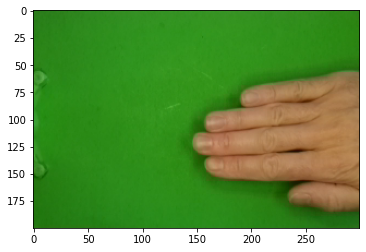

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpig 

img = mpig.imread('/content/rockpaperscissors/paper/oWI7JL85eXDhRFcV.png')

imgplot = plt.imshow(img)

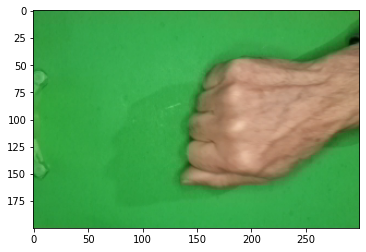

In [ ]:
img = mpig.imread('/content/rockpaperscissors/rock/JIdgNYR5ymqv8uxv.png')

imgplot = plt.imshow(img)

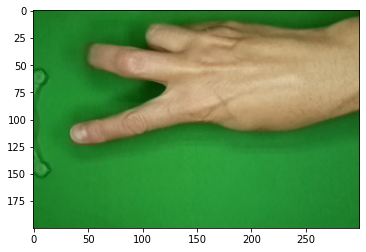

In [ ]:
img = mpig.imread('/content/rockpaperscissors/scissors/HJ3qSJKzOvM3IwZR.png')

imgplot = plt.imshow(img)

Hasil total gambar (data) sebanyak 2,188 gambar gambar ber format .png 
sample gambar berlatar belakang hijau

##Melakukan Augmentasi & Pemisahan Data menjadi Training dan Validasi 

In [ ]:
import tensorflow as tf
import keras_preprocessing 
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
Basis_directory = '/content/rockpaperscissors/rps-cv-images'
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest', 
        validation_split=0.2) #Membagi data validasi 20% dan training 80% (Kriteria 2 &3)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

## Label data dengan Image Data Generator

In [ ]:
train_generator = train_datagen.flow_from_directory(
    Basis_directory,
    target_size=(100,150),
    shuffle=True,
    subset="training",
    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
    Basis_directory,
    target_size=(100,150),
    shuffle=True,
    subset="validation",
    class_mode='categorical')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


## Membangun Model Jaringan Saraf Tiruan

Menggunakan model sequential (kriteria ke 5)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),                                                                                   
    
    tf.keras.layers.Dense(512, activation='relu'),                                
    
    tf.keras.layers.Dense(3, activation='softmax')                                
])
 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 148, 16)       448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5440)             

## Melakukan kompilasi model 


In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer=tf.optimizers.Adam(), 
              metrics=['accuracy'])

[Callback](https://https://pythonexamples.org/python-callback-function/) adalah sebuah fungsi yang dijalankan sebagai argumen ke fungsi lain, fungsi lain ini diharapkan untuk memanggil fungsi callback ini

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.97):
      print("Pelatihan berhenti, Akurasi Model Sudah Lebih 97%")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
import keras
import keras.callbacks
from keras.callbacks import TensorBoard

history= model.fit(
      train_generator,
      steps_per_epoch=16,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=50, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=4,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks=(callbacks)
      )

Epoch 1/50
16/16 - 12s - loss: 1.2612 - accuracy: 0.3770 - val_loss: 1.0922 - val_accuracy: 0.3906
Epoch 2/50
16/16 - 11s - loss: 1.0806 - accuracy: 0.4199 - val_loss: 1.0790 - val_accuracy: 0.3516
Epoch 3/50
16/16 - 10s - loss: 1.0444 - accuracy: 0.4941 - val_loss: 1.1033 - val_accuracy: 0.3516
Epoch 4/50
16/16 - 11s - loss: 1.0458 - accuracy: 0.4453 - val_loss: 0.9903 - val_accuracy: 0.5391
Epoch 5/50
16/16 - 10s - loss: 1.0056 - accuracy: 0.5109 - val_loss: 0.9022 - val_accuracy: 0.5859
Epoch 6/50
16/16 - 11s - loss: 0.9194 - accuracy: 0.5840 - val_loss: 0.8872 - val_accuracy: 0.5938
Epoch 7/50
16/16 - 10s - loss: 0.8389 - accuracy: 0.6322 - val_loss: 0.7978 - val_accuracy: 0.6719
Epoch 8/50
16/16 - 10s - loss: 0.6677 - accuracy: 0.6998 - val_loss: 0.6129 - val_accuracy: 0.7109
Epoch 9/50
16/16 - 11s - loss: 0.6151 - accuracy: 0.7266 - val_loss: 0.5286 - val_accuracy: 0.7500
Epoch 10/50
16/16 - 11s - loss: 0.5659 - accuracy: 0.7853 - val_loss: 0.4988 - val_accuracy: 0.8281
Epoch 11/

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

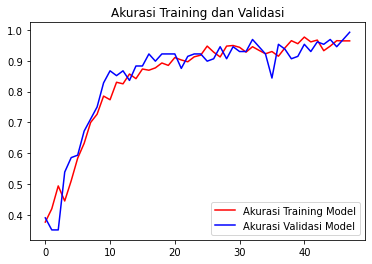

<Figure size 432x288 with 0 Axes>

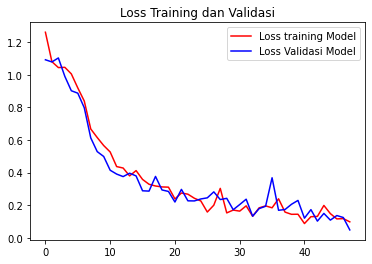

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label= 'Akurasi Training Model')
plt.plot(epochs, val_acc, 'b', label= 'Akurasi Validasi Model')
plt.title('Akurasi Training dan Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label= 'Loss training Model')
plt.plot(epochs, val_loss, 'b', label='Loss Validasi Model')
plt.title('Loss Training dan Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

Secara umum, ketika akurasi taraining dan validasi naik. maka loss training model dan validasi akan turun

## Prediksi gambar 


Saving Training 1.png to Training 1.png
Training 1.png
rock


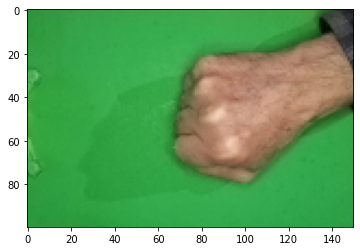

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  #Prediksi Gambar
  path = fn
  img = image.load_img( path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')

In [ ]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpo0gxuefg/assets


INFO:tensorflow:Assets written to: /tmp/tmpo0gxuefg/assets


In [ ]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)